# Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 

# Get data

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:
print(x, y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] [0 0 0 0 1 1 1 1 1 1]


# Create the model

In [4]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [5]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [6]:
model.classes_

array([0, 1])

In [7]:
print(model.intercept_, model.coef_)

[-1.04608067] [[0.51491375]]


# Evaluate the model

In [8]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [9]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [10]:
model.score(x, y)

0.9

In [11]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

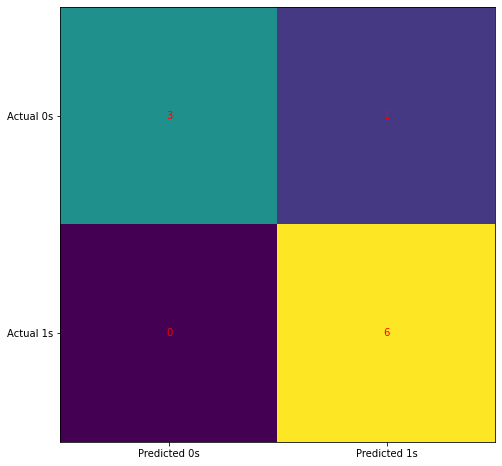

In [12]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [13]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



# Improve the model

In [14]:
model = LogisticRegression(solver='liblinear', C=10, random_state=0)
model.fit(x, y)

LogisticRegression(C=10, random_state=0, solver='liblinear')

In [15]:
print(model.intercept_, model.coef_)

[-3.51335372] [[1.12066084]]


In [16]:
print(model.predict_proba(x))

[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]


In [17]:
print(model.predict(x))

[0 0 0 0 1 1 1 1 1 1]


In [18]:
model.score(x, y)

1.0

In [19]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [20]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# Logreg: handwriting recognition

In [23]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
x, y = load_digits(return_X_y=True)

In [31]:
len(x)

1797

In [32]:
len(y)

1797

In [33]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [34]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [35]:
x[0][3]

13.0

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [37]:
print(len(x_train))
print(len(x_test))

1437
360


In [38]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [40]:
x_train

array([[ 0.        , -0.33790435, -1.09141592, ...,  1.58325794,
         3.53125595,  3.30213343],
       [ 0.        ,  2.90642897,  1.41696421, ...,  1.58325794,
         0.00595786, -0.18695903],
       [ 0.        ,  0.74354009,  0.99890086, ..., -1.14493411,
        -0.49765616, -0.18695903],
       ...,
       [ 0.        , -0.33790435, -0.04625753, ..., -1.14493411,
        -0.49765616, -0.18695903],
       [ 0.        , -0.33790435, -0.25528921, ..., -1.14493411,
        -0.49765616, -0.18695903],
       [ 0.        , -0.33790435,  0.16277415, ...,  0.73069792,
        -0.49765616, -0.18695903]])

In [41]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [42]:
x_test = scaler.transform(x_test)

In [43]:
x_test

array([[ 0.        , -0.33790435,  1.20793253, ...,  1.07172193,
         3.53125595,  4.46516425],
       [ 0.        ,  0.74354009,  2.04405924, ..., -0.97442211,
        -0.49765616, -0.18695903],
       [ 0.        ,  1.82498453,  1.62599589, ...,  1.58325794,
         3.53125595,  1.5575872 ],
       ...,
       [ 0.        ,  0.74354009,  0.78986918, ..., -0.4628861 ,
        -0.49765616, -0.18695903],
       [ 0.        , -0.33790435, -1.09141592, ...,  1.41274594,
         0.00595786, -0.18695903],
       [ 0.        , -0.33790435, -1.09141592, ...,  0.90120993,
        -0.49765616, -0.18695903]])

In [44]:
y_pred = model.predict(x_test)

In [45]:
model.score(x_train, y_train)

0.964509394572025

In [46]:
model.score(x_test, y_test)

0.9416666666666667

In [47]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]], dtype=int64)

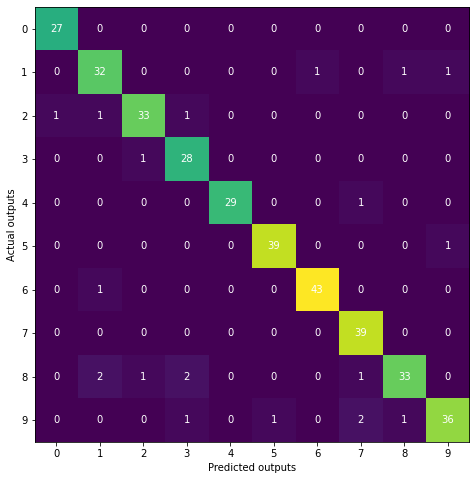

In [49]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))

ax.set_ylim(9.5, -0.5)

for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
        
plt.show()

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



# K-Nearest Neighbor (KNN)

In [51]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [52]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

weather_encoded=le.fit_transform(weather)
weather_encoded

array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1], dtype=int64)

In [54]:
temp_encoded=le.fit_transform(temp)

label=le.fit_transform(play)
print(temp_encoded)

temp_encoded=le.fit_transform(play)

label=le.fit_transform(play)
print(temp_encoded)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [55]:
features=list(zip(weather_encoded,temp_encoded))
features

[(2, 0),
 (2, 0),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 1),
 (2, 0),
 (2, 1),
 (1, 1),
 (2, 1),
 (0, 1),
 (0, 1),
 (1, 0)]

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
model = KNeighborsClassifier(n_neighbors=3)

model.fit(features,label)

predicted = model.predict([[0,2]])
predicted

array([1], dtype=int64)

# KNN with multiple labels

In [58]:
from sklearn import datasets

In [60]:
wine = datasets.load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [62]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [63]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [64]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [66]:
print(wine.data.shape)

(178, 13)


In [67]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [68]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [70]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.6296296296296297

In [71]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [73]:
metrics.accuracy_score(y_test, y_pred)

0.6851851851851852

In [74]:
error = []

for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

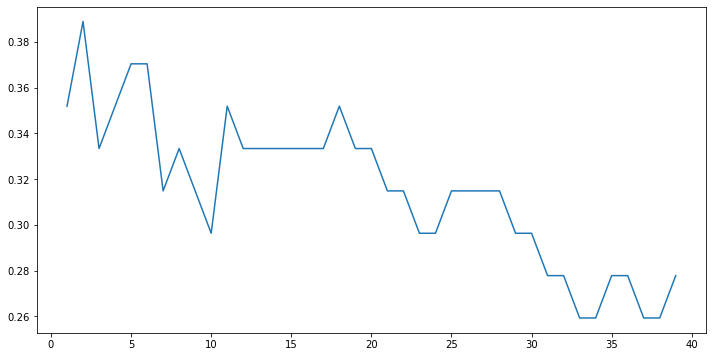

In [75]:
plt.figure(figsize=(12, 6))  

plt.plot(range(1, 40), error,)
plt.show()

In [77]:
knn = KNeighborsClassifier(n_neighbors=33)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.7407407407407407